<a href="https://colab.research.google.com/github/VaideswarReddy/Airbnb_data_analysis/blob/main/Vaideswar_Reddy_Team_4_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# importing required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/AB_NYC_2019.csv')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
len(df.host_name.unique())

11453

In [ ]:
len(df.name.unique())

47906

In [ ]:
df.host_name.value_counts()

Michael             417
David               403
Sonder (NYC)        327
John                294
Alex                279
                   ... 
Kd                    1
Shauna And Sarah      1
Petter                1
Shalisa               1
Arpit                 1
Name: host_name, Length: 11452, dtype: int64

In [ ]:
df.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Private Room                                          11
                                                      ..
Big, brt rm w/ king bed+ pvt bath in HK/MT West        1
纽约多单元大厦                                                1
Clean and Cozy Private Room in Inwood, Manhattan       1
Mod Home Steps from Prospect Park                      1
Amazing huge sunny room in the historical building     1
Name: name, Length: 47905, dtype: int64

In [ ]:
df.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Woodrow                  1
New Dorp                 1
Willowbrook              1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
df.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
new_df=df[df[{'host_id':df['host_id'],'neighbourhood_group' : df['neighbourhood_group'],'neighbourhood':df['neighbourhood'],'latitude':df['latitude'],'longitude':df['longitude'],'room_type':df['room_type'],'price': df['price'],'minimum_nights':df['minimum_nights'],'number_of_reviews': df['number_of_reviews'],'calculated_host_listings_count':df['calculated_host_listings_count']       }
new_df=pd.DataFrame(new_df)

In [ ]:
new_df = df[['host_name','name','neighbourhood_group','neighbourhood','latitude','longitude','room_type','price','minimum_nights','number_of_reviews','calculated_host_listings_count']]
new_df

,host_name,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,John,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6
1,Jennifer,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2
2,Elisabeth,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1
3,LisaRoxanne,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1
4,Laura,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1
...,...,...,...,...,...,...,...,...,...,...,...
48890,Sabrina,Charming one bedroom - newly renovated rowhouse,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2
48891,Marisol,Affordable room in Bushwick/East Williamsburg,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2
48892,Ilgar & Aysel,Sunny Studio at Historical Neighborhood,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1
48893,Taz,43rd St. Time Square-cozy single bed,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6


## **Analysing about different hosts and areas**

In [ ]:
df1 = pd.DataFrame(df.host_name.value_counts())
df1.reset_index(inplace=True)
df1.head(10)

,index,host_name
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


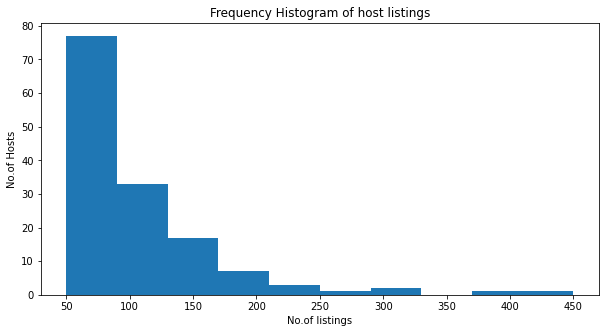

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(df1.host_name, bins=10, range=[50, 450])
plt.gca().set(title='Frequency Histogram of host listings', xlabel='No.of listings', ylabel='No.of Hosts');

[Text(0, 0, 'Michael'),
 Text(0, 0, 'David'),
 Text(0, 0, 'Sonder (NYC)'),
 Text(0, 0, 'John'),
 Text(0, 0, 'Alex'),
 Text(0, 0, 'Blueground'),
 Text(0, 0, 'Sarah'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Jessica'),
 Text(0, 0, 'Maria')]

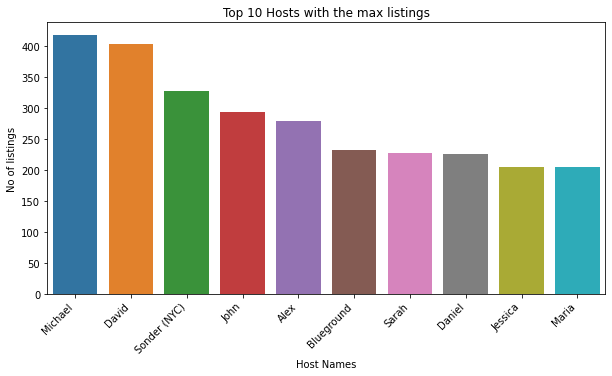

In [ ]:
plt.figure(figsize=(10,5))
host_hist=sns.barplot(x='index',y='host_name',data=df1.head(10))
host_hist.set_title('Top 10 Hosts with the max listings')
host_hist.set_ylabel('No of listings')
host_hist.set_xlabel('Host Names')
host_hist.set_xticklabels(host_hist.get_xticklabels(), 
                          rotation=45, 
                          horizontalalignment='right')

Text(0, 0.5, 'Number of listings')

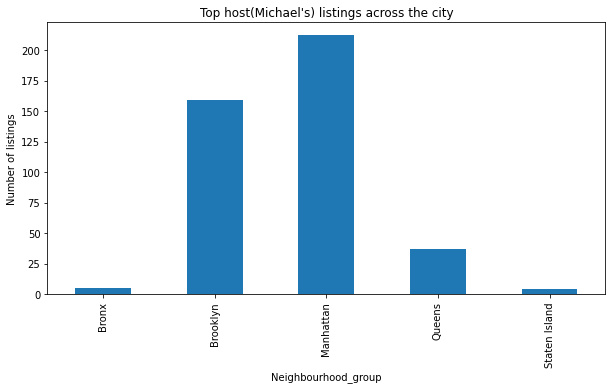

In [66]:
plt.figure(figsize=(10,5))
df_h=df[df['host_name']=='Michael']
host_listings=df_h.groupby(['neighbourhood_group'])['name'].count()
host_listings.plot(kind='bar')
plt.title(label="Top host(Michael's) listings across the city")
plt.xlabel(xlabel='Neighbourhood_group')
plt.ylabel(ylabel='Number of listings')

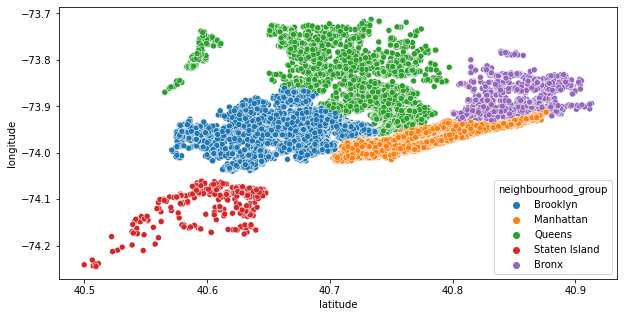

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df.latitude,y=df.longitude,hue=df.neighbourhood_group,)

<Figure size 720x360 with 0 Axes>

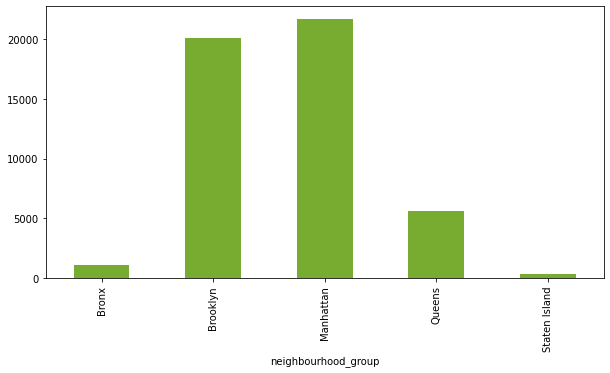

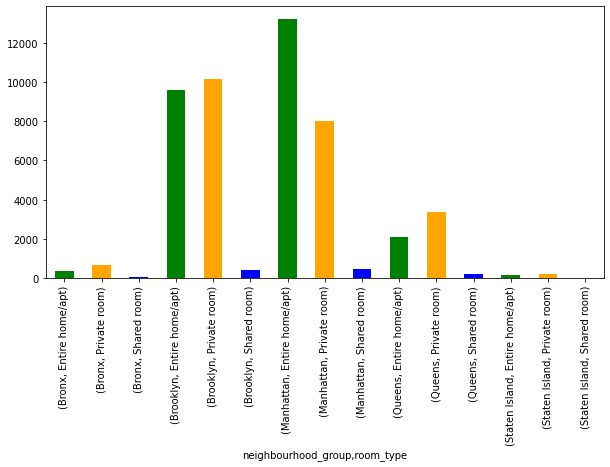

<Figure size 720x360 with 0 Axes>

In [45]:
plt.figure(figsize=(10,5))
listings = df.groupby(['neighbourhood_group'])['name'].count()
listings.plot(kind='bar',color=[0.4660, 0.6740, 0.1880])
# listings.set_title('Listings spread across neighbourhood_groups')
plt.figure(figsize=(10,5))
listings = df.groupby(['neighbourhood_group','room_type'])['name'].count()
listings.plot(kind='bar',color=['green','orange','blue'])
plt.figure(figsize=(10,5))

Text(0, 0.5, 'Number of rooms')

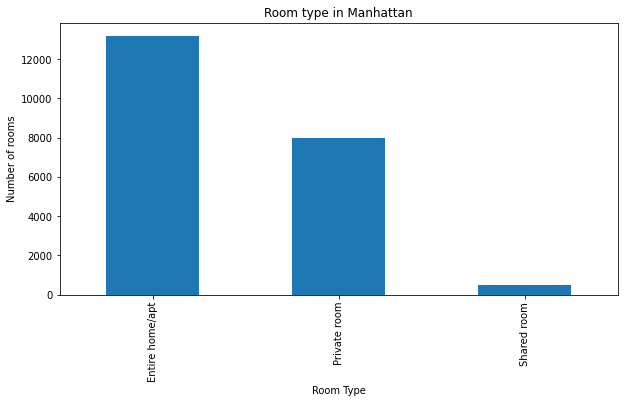

In [57]:
df_1=df[df['neighbourhood_group']=='Manhattan']
listings1=df_1['room_type'].value_counts()
plt.figure(figsize=(10,5))
listings1.plot(kind='bar')
plt.title(label='Room type in Manhattan')
plt.xlabel(xlabel='Room Type')
plt.ylabel(ylabel='Number of rooms')

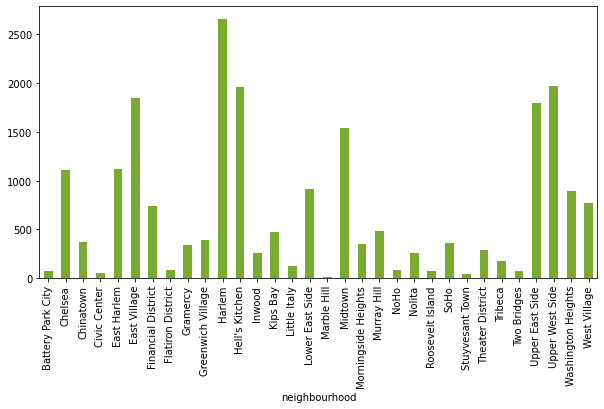

In [62]:
plt.figure(figsize=(10,5))
listings = df_1.groupby(['neighbourhood'])['name'].count()
listings.plot(kind='bar',color=[0.4660, 0.6740, 0.1880])

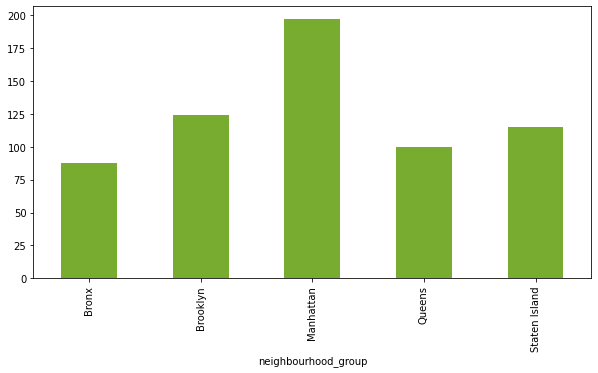

In [ ]:
plt.figure(figsize=(10,5))
prices_in_neighbourhood_group=new_df.groupby(['neighbourhood_group'])['price'].mean()
prices_in_neighbourhood_group.plot(kind='bar',color=[0.4660, 0.6740, 0.1880])

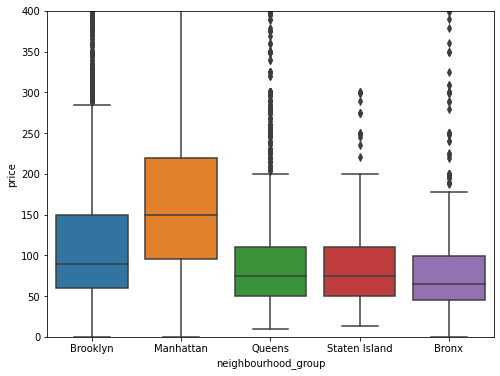

In [ ]:
#box plot neighbourhood_group/price
data = pd.concat([df['price'], df['neighbourhood_group']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='neighbourhood_group', y="price", data=data)
fig.axis(ymin=0, ymax=400);

In [ ]:
df.reviews_per_month.value_counts().max()

919

In [ ]:
#checking for outliers
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
#removing the outlier in price column
Q1_P = np.percentile(df.price,25)
Q3_P = np.percentile(df.price,75)
IQR_P = Q3_P-Q1_P
lowest_outlier_in_price=Q1_P-(1.5*IQR_P)
highest_outlier_in_price=Q3_P+(1.5*IQR_P)
#Outliers in minimum_nights
Q1_MN = np.percentile(df.minimum_nights,25)
Q3_MN = np.percentile(df.minimum_nights,75)
IQR_MN = Q3_MN-Q1_MN
lowest_outlier_in_MN=Q1_MN-(1.5*IQR_MN)
highest_outlier_in_MN=Q3_MN+(1.5*IQR_MN)


In [ ]:
highest_outlier_in_price

334.0

In [ ]:
highest_outlier_in_MN

11.0

In [ ]:
df4=(df[new_df['price']<highest_outlier_in_price])
df4

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


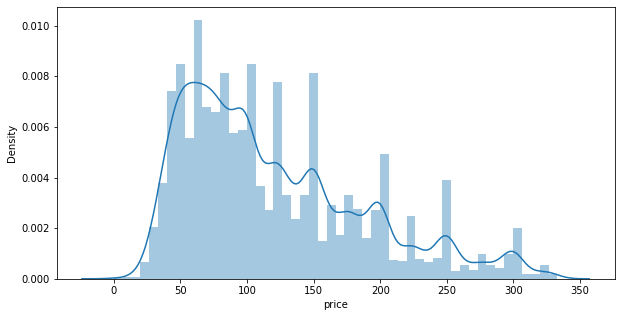

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df4['price'])

As per the above plot the price is positively skewed 

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df4['price'].skew())
print("Kurtosis: %f" % df4['price'].kurt())

Skewness: 0.922925
Kurtosis: 0.169543


In [ ]:
df.sort_values('reviews_per_month',ascending=False)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
42075,32678719,Enjoy great views of the City in our Deluxe Room!,244361589,Row NYC,Manhattan,Theater District,40.75918,-73.98801,Private room,100,1,156,2019-07-07,58.50,9,299
42076,32678720,Great Room in the heart of Times Square!,244361589,Row NYC,Manhattan,Theater District,40.75828,-73.98876,Private room,199,1,82,2019-07-07,27.95,9,299
38870,30423106,Lou's Palace-So much for so little,228415932,Louann,Queens,Rosedale,40.65417,-73.74158,Private room,45,1,37,2019-07-08,20.94,1,134
27287,21550302,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Nalicia,Queens,Springfield Gardens,40.66110,-73.76830,Private room,80,1,403,2019-07-06,19.75,3,26
28651,22176831,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Nalicia,Queens,Springfield Gardens,40.66158,-73.77050,Private room,50,1,341,2019-07-08,17.82,3,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
df.groupby('host_name')['reviews_per_month'].sum().sort_values(ascending=False)

host_name
David              508.61
Michael            475.82
Alex               443.44
Sonder (NYC)       397.56
John               321.02
                    ...  
Jaymes               0.00
Jayme                0.00
Jayd                 0.00
Jayar                0.00
Kortney William      0.00
Name: reviews_per_month, Length: 11452, dtype: float64

**David is the busiest host**

In [ ]:
df5=df[df['host_name']=='David']

In [ ]:
df5

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0
520,189181,Room in Chic Modern High Line Luxury- New!,912541,David,Manhattan,Chelsea,40.74695,-74.00454,Private room,255,4,1,2014-04-20,0.02,1,365
990,399946,Light Superhosted Chill LES Apt,1996265,David,Manhattan,Lower East Side,40.72123,-73.98996,Private room,90,10,67,2019-05-16,0.77,1,301
1040,433414,Spacious & Sunny in Prime Brooklyn,287733,David,Brooklyn,Clinton Hill,40.68472,-73.96691,Entire home/apt,150,20,89,2019-06-28,1.04,1,247
1087,456457,West Village Gem - 2BR,1594083,David,Manhattan,West Village,40.73204,-74.00189,Entire home/apt,315,3,7,2016-08-29,0.08,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48552,36314110,"Quiet, cozy and clean walkup in Greenpoint",17522037,David,Brooklyn,Greenpoint,40.72673,-73.95223,Private room,75,3,0,NaN,NaN,1,23
48756,36419441,Murray Hill Masterpiece,273824202,David,Manhattan,Murray Hill,40.74404,-73.97239,Entire home/apt,129,2,0,NaN,NaN,1,0
48846,36454717,#5 New Hotel-Like Private Room KING bed near JFK,263504959,David,Queens,Woodhaven,40.69185,-73.86431,Private room,37,1,0,NaN,NaN,8,352
48847,36455321,#6 New Hotel-Like Private Room QUEEN Bed near JFK,263504959,David,Queens,Woodhaven,40.69183,-73.86523,Private room,34,1,0,NaN,NaN,8,320


In [ ]:
df5.neighbourhood.value_counts()

Williamsburg          33
Harlem                26
Hell's Kitchen        26
Bedford-Stuyvesant    23
Upper East Side       23
                      ..
Boerum Hill            1
Port Morris            1
Ditmars Steinway       1
Stapleton              1
Emerson Hill           1
Name: neighbourhood, Length: 80, dtype: int64

In [ ]:
df5.room_type.value_counts()

Entire home/apt    214
Private room       184
Shared room          5
Name: room_type, dtype: int64

In [ ]:
df5.minimum_nights.value_counts()

1      111
2       92
3       62
4       25
5       25
30      22
6       14
7       12
20       7
10       5
21       3
14       3
13       3
31       2
8        2
15       2
12       1
11       1
365      1
300      1
25       1
26       1
28       1
150      1
153      1
184      1
240      1
265      1
19       1
Name: minimum_nights, dtype: int64

In [68]:
df6=df[df['neighbourhood_group']=='Manhattan']


In [ ]:
df6.room_type.value_counts()

Entire home/apt    13199
Private room        7982
Shared room          480
Name: room_type, dtype: int64